In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [64]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [4]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
g_per = (df['Class'].value_counts()[0]/len(df))*100
f_per = (df['Class'].value_counts()[1]/len(df))*100

g_per = round(g_per,3)
f_per = round(f_per,3)

print("Genuine percentage:" ,g_per,"%")
print("Fraud percentage:" ,f_per,"%")

Genuine percentage: 99.827 %
Fraud percentage: 0.173 %


In [12]:
df[df.Class==1] #all the frauds

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [46]:
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a dataframe

df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


In [40]:
X= df.drop("Class",axis='columns')
y= df["Class"]

In [56]:
X_train , X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [62]:
y_train.value_counts()[1]

398

In [42]:
X_train.shape

(227845, 30)

In [43]:
X_test.shape

(56962, 30)

In [47]:
len(X_train.columns)

30

In [57]:
model = keras.Sequential([
    keras.layers.Dense(20 , input_shape=(30,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
7121/7121 [==============================] - 11s 1ms/step - loss: 5.2911 - accuracy: 0.9962
Epoch 2/5
7121/7121 [==============================] - 8s 1ms/step - loss: 4.8377 - accuracy: 0.9962
Epoch 3/5
7121/7121 [==============================] - 10s 1ms/step - loss: 3.3661 - accuracy: 0.9963
Epoch 4/5
7121/7121 [==============================] - 8s 1ms/step - loss: 3.1841 - accuracy: 0.9966
Epoch 5/5
7121/7121 [==============================] - 9s 1ms/step - loss: 3.2660 - accuracy: 0.9967


In [63]:
model.evaluate(X_test,y_test)

1781/1781 [==============================] - 2s 1ms/step - loss: 8.3146 - accuracy: 0.9984


[8.314647674560547, 0.9983673095703125]

In [65]:
yp = model.predict(X_test)
yp[:5]

1781/1781 [==============================] - 2s 1ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [66]:
y_test[:5]

168367    0
110270    0
243562    0
74702     0
98416     0
Name: Class, dtype: int64

In [67]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else :
        y_pred.append(0)

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.67      0.02      0.04        94

    accuracy                           1.00     56962
   macro avg       0.83      0.51      0.52     56962
weighted avg       1.00      1.00      1.00     56962



Text(92.25, 0.5, 'Truth')

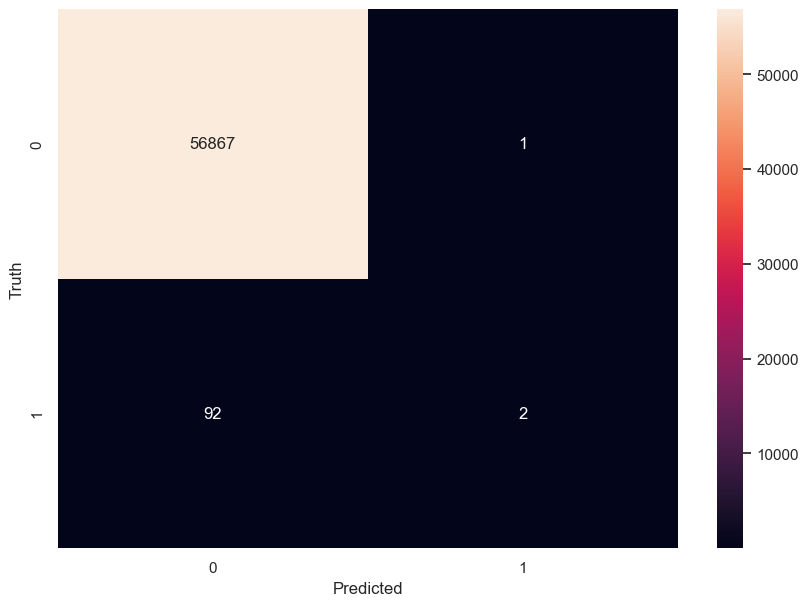

In [69]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')

#### Undersampling

In [122]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(30, input_dim=30, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=10)
    else:
        model.fit(X_train, y_train, epochs=10, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [117]:
# Class count
count_class_0, count_class_1 = df.Class.value_counts()

# Divide by class
df_class_0 = df[df['Class'] == 0]
df_class_1 = df[df['Class'] == 1]

In [118]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Class.value_counts())

Random under-sampling:
0    492
1    492
Name: Class, dtype: int64


In [119]:
X = df_test_under.drop('Class',axis='columns')
y = df_test_under['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [120]:
# Number of classes in training Data
y_train.value_counts()

1    394
0    393
Name: Class, dtype: int64

In [123]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
25/25 [==============================] - 1s 2ms/step - loss: 2680.3088 - accuracy: 0.4892
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 382.4384 - accuracy: 0.4663
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 138.1082 - accuracy: 0.5286
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 96.4495 - accuracy: 0.5210
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 82.1084 - accuracy: 0.5286
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 120.2841 - accuracy: 0.5108
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 47.9779 - accuracy: 0.5667
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 36.9083 - accuracy: 0.5565
Epoch 9/10
25/25 [==============================] - 0s 2ms/step - loss: 39.3994 - accuracy: 0.5502
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 35.3349 - accuracy: 0.6244
[35.33

### Oversampling

In [124]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Class.value_counts())

Random over-sampling:
0    284315
1    284315
Name: Class, dtype: int64


In [125]:
X = df_test_over.drop('Class',axis='columns')
y = df_test_over['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [126]:
# Number of classes in training Data
y_train.value_counts()

0    227452
1    227452
Name: Class, dtype: int64

In [127]:

loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10
14216/14216 [==============================] - 21s 1ms/step - loss: 14.4564 - accuracy: 0.8168
Epoch 2/10
14216/14216 [==============================] - 20s 1ms/step - loss: 8.5334 - accuracy: 0.8908
Epoch 3/10
14216/14216 [==============================] - 19s 1ms/step - loss: 6.1764 - accuracy: 0.9031
Epoch 4/10
14216/14216 [==============================] - 19s 1ms/step - loss: 3.7241 - accuracy: 0.9074
Epoch 5/10
14216/14216 [==============================] - 19s 1ms/step - loss: 2.2864 - accuracy: 0.9159
Epoch 6/10
14216/14216 [==============================] - 20s 1ms/step - loss: 1.0094 - accuracy: 0.9164
Epoch 7/10
14216/14216 [==============================] - 19s 1ms/step - loss: 0.2844 - accuracy: 0.9297
Epoch 8/10
14216/14216 [==============================] - 18s 1ms/step - loss: 0.1794 - accuracy: 0.9358
Epoch 9/10
14216/14216 [==============================] - 19s 1ms/step - loss: 0.1714 - accuracy: 0.9384
Epoch 10/10
3554/3554 [==============================]

### Smote

In [128]:
X = df.drop('Class',axis='columns')
y = df['Class']

In [131]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

AttributeError: 'SMOTE' object has no attribute 'fit_sample'